[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mahdidi/Titanic-Survival.git/blob/main/titan.ipynb)
[![Open In Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/mahdidi/Titanic-Survival.git/blob/main/titan.ipynb)

# proj

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [2]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [3]:
train_df = pd.read_csv( "train.csv")
test_df = pd.read_csv("test.csv")

train_df = train_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
test_df = test_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors='ignore')

def preprocess_data(df):
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
    return df

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

label_encoders = {}
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    if col in test_df.columns:
        test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le


X_train = train_df.drop(columns=["Survived"])
y_train = train_df["Survived"]
X_test = test_df  
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13188\836519386.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13188\836519386.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [4]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [5]:
def make_mi_scores(X,y):
    X=X.copy()
    for col in X.select_dtypes(['object', 'category']):
        X[col], _ = X[col].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
        

In [6]:
X=train_df.copy()
y=X.pop('Survived')

mi_scores = make_mi_scores(X, y)

Sex         0.158776
Fare        0.145373
Pclass      0.053259
Embarked    0.038675
Age         0.013381
Parch       0.005797
SibSp       0.000000
Name: MI Scores, dtype: float64


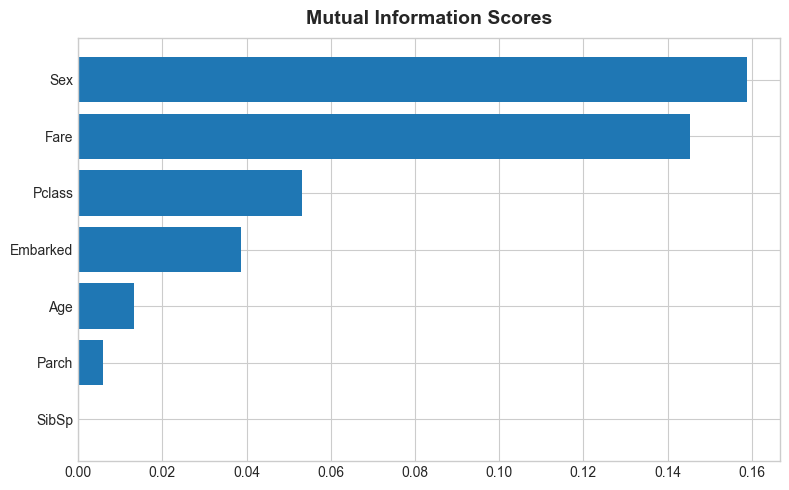

In [7]:
print(mi_scores.head(20))


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))        

# INformation Gain

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import KBinsDiscretizer

# بارگذاری داده‌ها
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# حذف ستون‌های غیرضروری
train_df = train_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
test_df = test_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors='ignore')

# تابع پیش‌پردازش داده‌ها
def preprocess_data(df):
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
    return df

# اعمال پیش‌پردازش
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# کدگذاری ویژگی‌های غیرعددی
label_encoders = {}
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    if col in test_df.columns:
        test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

# جدا کردن ویژگی‌ها و برچسب‌ها
X_train = train_df.drop(columns=["Survived"])
y_train = train_df["Survived"]
X_test = test_df

# تقسیم داده‌های آموزشی به آموزشی و اعتبارسنجی
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# تابع محاسبه Entropy
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probs = counts / len(y)
    return -np.sum(probs * np.log2(probs + 1e-10))  # جلوگیری از log(0)

# تابع محاسبه Information Gain
def information_gain(X, y, feature):
    total_entropy = entropy(y)
    # برای ویژگی‌های پیوسته (مثل Age و Fare)، آن‌ها را به بازه‌های گسسته تبدیل می‌کنیم
    if X[feature].dtype in [np.float64, np.int64] and len(np.unique(X[feature])) > 10:
        discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
        X_binned = discretizer.fit_transform(X[[feature]].values.reshape(-1, 1)).ravel()
    else:
        X_binned = X[feature]
    
    values, counts = np.unique(X_binned, return_counts=True)
    weighted_entropy = 0
    for value, count in zip(values, counts):
        y_subset = y[X_binned == value]
        weighted_entropy += (count / len(y)) * entropy(y_subset)
    
    return total_entropy - weighted_entropy

# محاسبه Information Gain برای هر ویژگی
ig_weights = {}
for feature in X_train_split.columns:
    ig = information_gain(X_train_split, y_train_split, feature)
    ig_weights[feature] = ig
    print(f"Information Gain for'{feature}': {ig:.4f}")

# تبدیل به آرایه و نرمال‌سازی
ig_values = np.array(list(ig_weights.values()))
ig_weights_normalized = ig_values / ig_values.sum()

# چاپ وزن‌های نرمال‌شده
print("\nnormalize weight(Information Gain):")
for feature, weight in zip(X_train_split.columns, ig_weights_normalized):
    print(f"{feature}: {weight:.4f}")

# اعمال وزن‌ها به داده‌ها
X_train_split_weighted = X_train_split * ig_weights_normalized
X_val_weighted = X_val * ig_weights_normalized
X_test_weighted = X_test * ig_weights_normalized

# ساخت و آموزش مدل Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split_weighted, y_train_split)

# پیش‌بینی روی مجموعه اعتبارسنجی
y_val_pred = rf_model.predict(X_val_weighted)

# ارزیابی مدل روی مجموعه اعتبارسنجی
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nAccuracy on validation set: {accuracy:.4f}")
print("\nClassification Report on validation set:")
print(classification_report(y_val, y_val_pred))

# پیش‌بینی روی مجموعه آزمایشی (test_df)
y_test_pred = rf_model.predict(X_test_weighted)



C:\Users\DELL\AppData\Local\Temp\ipykernel_13188\1274715488.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13188\1274715488.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Information Gain for'Pclass': 0.0768
Information Gain for'Sex': 0.2154
Information Gain for'Age': 0.0236
Information Gain for'SibSp': 0.0291
Information Gain for'Parch': 0.0284
Information Gain for'Fare': 0.0590
Information Gain for'Embarked': 0.0181

normalize weight(Information Gain):
Pclass: 0.1704
Sex: 0.4783
Age: 0.0524
SibSp: 0.0646
Parch: 0.0631
Fare: 0.1311
Embarked: 0.0401

Accuracy on validation set: 0.8212

Classification Report on validation set:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Greedy

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# بارگذاری داده‌ها
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# حذف ستون‌های غیرضروری
train_df = train_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
test_df = test_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors='ignore')

# تابع پیش‌پردازش داده‌ها
def preprocess_data(df):
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
    return df

# اعمال پیش‌پردازش
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# کدگذاری ویژگی‌های غیرعددی
label_encoders = {}
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    if col in test_df.columns:
        test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

# جدا کردن ویژگی‌ها و برچسب‌ها
X_train = train_df.drop(columns=["Survived"])
y_train = train_df["Survived"]
X_test = test_df

# تقسیم داده‌های آموزشی به آموزشی و اعتبارسنجی
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# اهمیت اولیه ویژگی‌ها (از ورودی شما)
feature_importance = {
    'Sex': 0.158776,
    'Fare': 0.145373,
    'Pclass': 0.053259,
    'Embarked': 0.038675,
    'Age': 0.013381,
    'Parch': 0.005797,
    'SibSp': 0.000000
}

# مرتب‌سازی ویژگی‌ها بر اساس اهمیت
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# تخصیص وزن‌های حریصانه
n_features = len(sorted_features)  # تعداد ویژگی‌ها (7)
greedy_weights = {}
for i, (feature, _) in enumerate(sorted_features):
    greedy_weights[feature] = n_features - i  # وزن کاهشی: 7, 6, ..., 1

# محاسبه مجموع وزن‌ها برای نرمال‌سازی
total_weight = sum(greedy_weights.values())  # 7 + 6 + 5 + 4 + 3 + 2 + 1 = 28

# نرمال‌سازی وزن‌ها
greedy_weights_normalized = {feature: weight / total_weight for feature, weight in greedy_weights.items()}

# چاپ وزن‌های نرمال‌شده
print("normalize weight (Greedy):")
for feature, weight in greedy_weights_normalized.items():
    print(f"{feature}: {weight:.4f}")

# تبدیل وزن‌ها به آرایه بر اساس ترتیب ستون‌های X
weights = np.array([greedy_weights_normalized[col] for col in X_train_split.columns])

# اعمال وزن‌ها به داده‌ها
X_train_split_weighted = X_train_split * weights
X_val_weighted = X_val * weights
X_test_weighted = X_test * weights

# ساخت و آموزش مدل Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split_weighted, y_train_split)

# پیش‌بینی روی مجموعه اعتبارسنجی
y_val_pred = rf_model.predict(X_val_weighted)

# ارزیابی مدل روی مجموعه اعتبارسنجی
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nAccuracy on validation set: {accuracy:.4f}")
print("\nClassification Report on validation set:")
print(classification_report(y_val, y_val_pred))

# پیش‌بینی روی مجموعه آزمایشی (test_df)
y_test_pred = rf_model.predict(X_test_weighted)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13188\421180900.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13188\421180900.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

normalize weight (Greedy):
Sex: 0.2500
Fare: 0.2143
Pclass: 0.1786
Embarked: 0.1429
Age: 0.1071
Parch: 0.0714
SibSp: 0.0357

Accuracy on validation set: 0.8268

Classification Report on validation set:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100, 200, 400, 500]
   
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'n_estimators': 100}


In [12]:
n_samples = 7  # تعداد نمونه‌های بوت‌استرپ
bootstrap_samples = []

for i in range(n_samples):
    sample = train_df.sample(n=len(train_df), replace=True, random_state=42 + i)
    bootstrap_samples.append(sample)

# تعریف مدل‌های weak learners
weak_learners = []
models = [
    XGBClassifier(n_estimators=500, use_label_encoder=False, eval_metric="logloss"),
    DecisionTreeClassifier(min_samples_split=5, max_depth=10),
    RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2),
    SVC(probability=True),  # اضافه کردن SVM
    LogisticRegression(),   # اضافه کردن رگرسیون لجستیک
    ExtraTreesClassifier(n_estimators=100),  # جایگزین LightGBM با Extra Trees
    KNeighborsClassifier(n_neighbors=5)
]

for i, sample in enumerate(bootstrap_samples):
    X_sample = sample.drop(columns=["Survived"])
    y_sample = sample["Survived"]
    model = models[i]
    model.fit(X_sample, y_sample)
    weak_learners.append((f'model_{i+1}', model))

# ایجاد strong learner با VotingClassifier
strong_learner = VotingClassifier(estimators=weak_learners, voting='hard')
strong_learner.fit(X_train_split, y_train_split)

# پیش‌بینی روی داده‌های تست
y_val_pred = strong_learner.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)



c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:10:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18

Validation Accuracy: 0.8268156424581006
